## KNN
- KNN（K-Nearest Neighbor）最邻近分类算法是数据挖掘分类（classification）技术中最简单的算法之一，其指导思想是”近朱者赤，近墨者黑“，即由你的邻居来推断出你的类别。
- KNN算法的关键：
  - 样本的所有特征都要做可比较的**量化**  
    若是样本特征中存在非数值的类型，必须采取手段将其量化为数值。例如样本特征中包含颜色，可通过将颜色转换为灰度值来实现距离计算。  
  - **样本特征要做归一化处理**
    样本有多个参数，每一个参数都有自己的定义域和取值范围，他们对距离计算的影响不一样，如取值较大的影响力会盖过取值较小的参数。所以样本参数必须做一些 scale 处理，最简单的方式就是所有特征的数值都采取归一化处置。
  - 需要一个**距离函数**以计算两个样本之间的距离  
    通常使用的距离函数有：欧氏距离、余弦距离、汉明距离、曼哈顿距离等，一般选欧氏距离作为距离度量，但是这是只适用于连续变量。在文本分类这种非连续变量情况下，汉明距离可以用来作为度量。通常情况下，如果运用一些特殊的算法来计算度量的话，K近邻分类精度可显著提高，如运用大边缘最近邻法或者近邻成分分析法。
  - (4) 确定K的值
    K值选的太大易引起欠拟合，太小容易过拟合，需**交叉验证**确定K值。

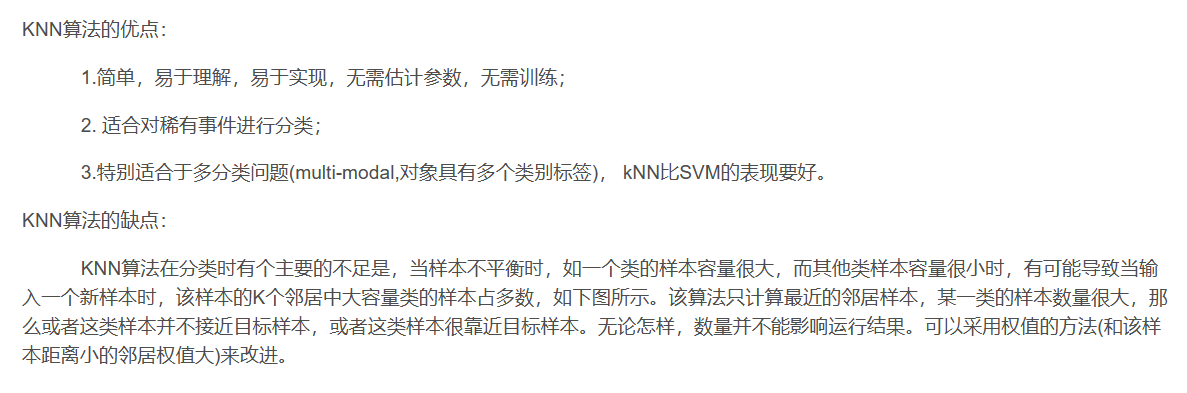  
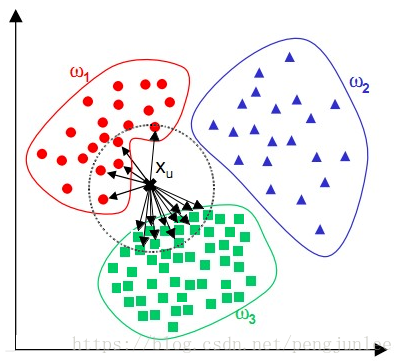

### 案例
使用鸢尾花卉数据集进行分类

In [ ]:
import math
import csv
import operator
import random
import numpy as np
from sklearn.datasets import make_blobs
 
#Python version 3.6.5
 
# 生成样本数据集 samples(样本数量) features(特征向量的维度) centers(类别个数)
def createDataSet(samples=100, features=2, centers=2):
    return make_blobs(n_samples=samples, n_features=features, centers=centers, cluster_std=1.0, random_state=8)
 
# 加载鸢尾花卉数据集 filename(数据集文件存放路径)
def loadIrisDataset(filename):
    with open(r'Iris_database\iris.txt', 'r') as csvfile:
        lines = csvfile.readlines()
        dataset = []
        for line in lines:
            line_data = line.strip().split(' ')
            line_data = [float(x) if x.replace('.', '', 1).isdigit() else x.strip('"') for x in line_data]
            dataset.append(line_data[1:])
        dataset = dataset[1:][:]
        print(dataset)
        # lines = csv.reader(csvfile)
        # for l in lines: # 这一步就相当于将reader中的每个列表取出
        #     print(l)   # ['id', 'name', 'age']
        # dataset = list(lines)
        # dataset = dataset[:][1:]
        # # print(dataset)
        # for x in range(len(dataset)):
        #     for y in range(4):
        #         dataset[x][y] = float(dataset[x][y])
        return dataset
    
# 拆分数据集 dataset(要拆分的数据集) split(训练集所占比例) trainingSet(训练集) testSet(测试集)
def splitDataSet(dataSet, split, trainingSet=[], testSet=[]):
    for x in range(len(dataSet)):
        if random.random() <= split:
            trainingSet.append(dataSet[x])
        else:
            testSet.append(dataSet[x])
# 计算欧氏距离 
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)
 
# 选取距离最近的K个实例
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance) - 1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors
 
#  获取距离最近的K个实例中占比例较大的分类
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
 
# 计算准确率
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct / float(len(testSet))) * 100.0
 
 
def main():
    # 使用自定义创建的数据集进行分类
    # x,y = createDataSet(features=2)
    # dataSet= np.c_[x,y]
    
    # 使用鸢尾花卉数据集进行分类
    dataSet = loadIrisDataset(r'Iris_database\iris.txt')
    trainingSet = []
    testSet = []
    splitDataSet(dataSet, 0.75, trainingSet, testSet)
    print('Train set:' + repr(len(trainingSet)))
    print('Test set:' + repr(len(testSet)))
    predictions = []
    k = 5
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('predicted=' + repr(result) + ',actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
main()
    

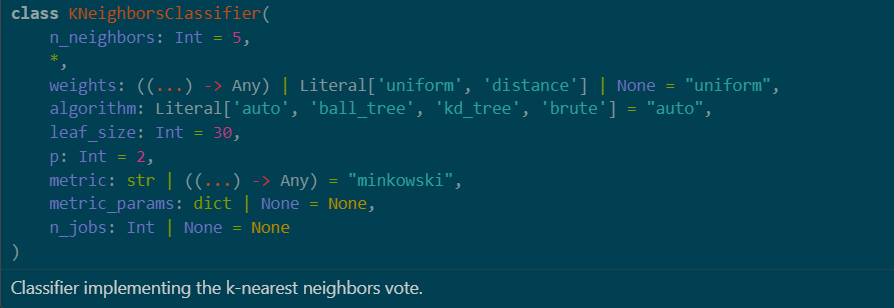

### 案例：红酒的分类，用sklearn模块

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
 
# 从 sklearn的datasets模块载入数据集加载酒的数据集
wineDataSet=load_wine()
print(len(wineDataSet.data),len(wineDataSet.data[0]))
# print("红酒数据集中的键：\n{}".format(wineDataSet.keys()))
# print("数据概况：\n{}".format(wineDataSet['data'].shape))
# print(wineDataSet['DESCR'])
 
# 将数据集拆分为训练数据集和测试数据集
X_train,X_test,y_train,y_test=train_test_split(wineDataSet['data'],wineDataSet['target'],random_state=0)
print("X_train shape:{}".format(X_train.shape))
print("X_test shape:{}".format(X_test.shape))
print("y_train shape:{}".format(y_train.shape))
print("y_test shape:{}".format(y_test.shape))
 
knn = KNeighborsClassifier(n_neighbors=1,p=1)
knn.fit(X_train,y_train)
print(knn)
 
# 评估模型的准确率
print(knn.predict(X_test))
print('测试数据集得分：{:.2f}'.format(knn.score(X_test,y_test)))
 
# 使用建好的模型对新酒进行分类预测
X_new = np.array([[13.2,2.77,2.51,18.5,96.6,1.04,2.55,0.57,1.47,6.2,1.05,3.33,820]])
prediction = knn.predict(X_new)
print("预测新酒的分类为：{}".format(wineDataSet['target_names'][prediction]))

178 13
X_train shape:(133, 13)
X_test shape:(45, 13)
y_train shape:(133,)
y_test shape:(45,)
KNeighborsClassifier(n_neighbors=1, p=1)
[0 2 1 0 1 1 0 2 1 1 0 1 0 2 1 1 0 0 1 0 1 0 1 1 1 1 1 1 2 2 0 0 2 0 0 0 2
 1 1 2 0 0 1 1 1]
测试数据集得分：0.84
预测新酒的分类为：['class_2']


参考：https://blog.csdn.net/pengjunlee/article/details/82713047

### 作业1：iris

In [7]:
import torch
from kneighborsclassifier import KNeighborsClassifier
def loadIrisDataset(filename:str) -> list:
    with open(filename, 'r',encoding='utf_8') as csvfile:
        lines = csvfile.readlines()
        dataset = []
        for line in lines:
            line_data = line.strip().split(' ')
            line_data = [float(x) if x.replace('.', '', 1).isdigit() else x.strip('"') for x in line_data]
            dataset.append(line_data[1:])
        dataset = dataset[1:]
        print(len(dataset),len(dataset[0]))
    return dataset

dataSet = loadIrisDataset(r'data\Iris_database\iris.txt')
data = torch.FloatTensor([x[0:-1] for x in dataSet])
print(data.shape)
targetstr = [x[-1] for x in dataSet]
unique_labels = list(set(targetstr))
print("labels:",unique_labels)
target = torch.IntTensor([unique_labels.index(x) for x in targetstr])
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.4,random_state=0)
print("X_train shape:{}".format(X_train.shape),"X_test shape:{}".format(X_test.shape))
print("y_train shape:{}".format(Y_train.shape),"y_test shape:{}".format(Y_test.shape))

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)
knn.fit(X_train,Y_train)
print(knn.predict(X_test))
print('Accuracy: ' + repr(knn.score(X_test,Y_test)*100) + '%')

150 5
torch.Size([150, 4])
labels: ['setosa', 'virginica', 'versicolor']
X_train shape:torch.Size([90, 4]) X_test shape:torch.Size([60, 4])
y_train shape:torch.Size([90]) y_test shape:torch.Size([60])
X_train Y_train的shape: torch.Size([90, 4]) torch.Size([90])
[1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1]
predicted=1,actual=1
predicted=2,actual=2
predicted=0,actual=0
predicted=1,actual=1
predicted=0,actual=0
predicted=1,actual=1
predicted=0,actual=0
predicted=2,actual=2
predicted=2,actual=2
predicted=2,actual=2
predicted=1,actual=1
predicted=2,actual=2
predicted=2,actual=2
predicted=2,actual=2
predicted=2,actual=2
predicted=0,actual=0
predicted=2,actual=2
predicted=2,actual=2
predicted=0,actual=0
predicted=0,actual=0
predicted=1,actual=1
predicted=2,actual=2
predicted=0,actual=0
predicted=0,actual=0
predicted=2,actual=1
predicted=0,actual=0
predicted=0,

### 作业二：cifar10  
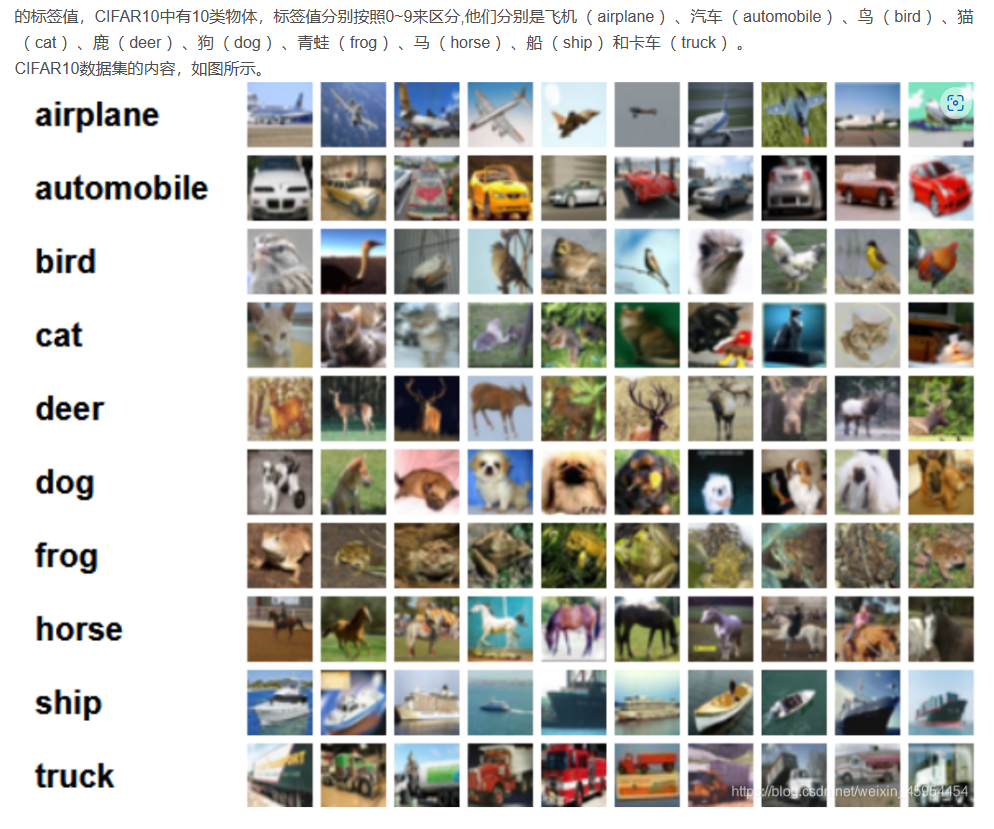
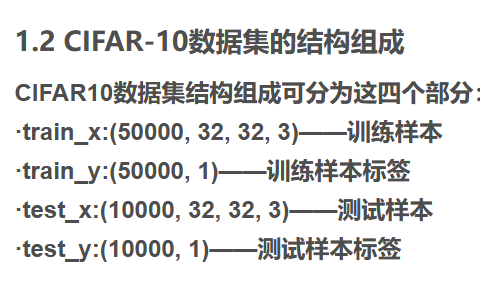

#### 1.RGB不量化直接放进去：很慢准确率低

In [8]:
from kneighborsclassifier import KNeighborsClassifier
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

## 载入数据
train_dataset = CIFAR10(root='./data', train=True, download=True)
test_dataset = CIFAR10(root='./data', train=False, download=True)
print(type(train_dataset),type(test_dataset))

## 访问第一个样本显示图像
image, label = train_dataset[0] 
plt.imshow(image)
plt.axis('off')
plt.show()
print("Label:", label)

## 处理样本生成张量，第一个维度是图片编号，第二个维度是features，这里就是RGB
# train
images = []
labels = []
for i in range(len(train_dataset)):
    image, label = train_dataset[i]# 获取图像和标签
    transform = transforms.Compose([transforms.ToTensor()])# 将PIL图像对象转换为张量，并自动归一化到范围[0, 1]之间
    image_tensor = transform(image)
    images.append(image_tensor)# 将图像和标签添加到列表中
    labels.append(label)
X_train = torch.stack(images)# 将列表转换为张量
X_train = X_train.reshape(X_train.shape[0],-1)
Y_train = torch.tensor(labels)

# test
images.clear()
labels.clear()
for i in range(len(test_dataset)):
    image, label = test_dataset[i]# 获取图像和标签
    transform = transforms.Compose([transforms.ToTensor()])# 将PIL图像对象转换为张量，并自动归一化到范围[0, 1]之间
    image_tensor = transform(image)
    images.append(image_tensor)# 将图像和标签添加到列表中
    labels.append(label)
X_test = torch.stack(images)# 将列表转换为张量
X_test = X_test.reshape(X_test.shape[0],-1)
Y_test = torch.tensor(labels)

## KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
knn.fit(X_train,Y_train)
print(knn.predict(X_test[0:5]))
print('Accuracy: ' + repr(knn.score(X_test[0:100],Y_test[0:100])*100) + '%')# 打印准确率

X_train Y_train的shape: torch.Size([50000, 3072]) torch.Size([50000])
[2, 8, 8, 0, 4]
predicted=2,actual=3
predicted=8,actual=8
predicted=8,actual=8
predicted=0,actual=0
predicted=4,actual=6
predicted=6,actual=6
predicted=2,actual=1
predicted=2,actual=6
predicted=4,actual=3
predicted=8,actual=1
predicted=0,actual=0
predicted=9,actual=9
predicted=6,actual=5
predicted=6,actual=7
predicted=4,actual=9
predicted=8,actual=8
predicted=3,actual=5
predicted=4,actual=7
predicted=1,actual=8
predicted=6,actual=6
predicted=7,actual=7
predicted=0,actual=0
predicted=0,actual=4
predicted=2,actual=9
predicted=2,actual=5
predicted=4,actual=2
predicted=4,actual=4
predicted=7,actual=0
predicted=9,actual=9
predicted=4,actual=6
predicted=6,actual=6
predicted=5,actual=5
predicted=5,actual=4
predicted=7,actual=5
predicted=8,actual=9
predicted=3,actual=2
predicted=4,actual=4
predicted=8,actual=1
predicted=8,actual=9
predicted=5,actual=5
predicted=0,actual=4
predicted=6,actual=6
predicted=3,actual=5
predicted=4,

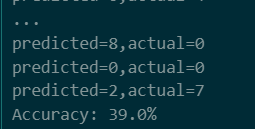
效果不太好
#### 2.特征降维
- 主成分分析PCA 

Files already downloaded and verified
Files already downloaded and verified
<class 'torchvision.datasets.cifar.CIFAR10'> <class 'torchvision.datasets.cifar.CIFAR10'>


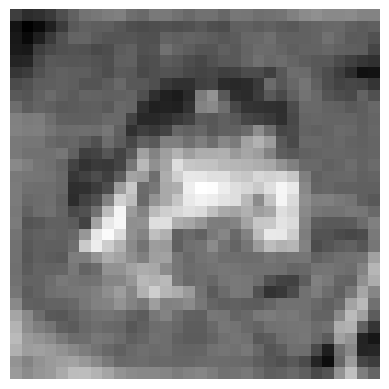

Label: 6


C:\Users\Ruiling\AppData\Local\Temp\ipykernel_15832\1304147034.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train)
C:\Users\Ruiling\AppData\Local\Temp\ipykernel_15832\1304147034.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test)


开始使用knn进行训练
X_train Y_train的shape: torch.Size([50000, 10]) torch.Size([50000])
predicted=2,actual=3
predicted=8,actual=8
predicted=0,actual=8
predicted=0,actual=0
predicted=2,actual=6
predicted=6,actual=6
predicted=6,actual=1
predicted=2,actual=6
predicted=2,actual=3
predicted=1,actual=1
predicted=8,actual=0
predicted=1,actual=9
predicted=1,actual=5
predicted=1,actual=7
predicted=7,actual=9
predicted=9,actual=8
predicted=5,actual=5
predicted=4,actual=7
predicted=8,actual=8
predicted=7,actual=6
predicted=1,actual=7
predicted=0,actual=0
predicted=0,actual=4
predicted=6,actual=9
predicted=7,actual=5
predicted=2,actual=2
predicted=2,actual=4
predicted=0,actual=0
predicted=1,actual=9
predicted=4,actual=6
predicted=6,actual=6
predicted=5,actual=5
predicted=4,actual=4
predicted=7,actual=5
predicted=9,actual=9
predicted=7,actual=2
predicted=7,actual=4
predicted=1,actual=1
predicted=3,actual=9
predicted=5,actual=5
predicted=8,actual=4
predicted=6,actual=6
predicted=3,actual=5
predicted=4,actual

C:\Users\Ruiling\AppData\Local\Temp\ipykernel_15832\1304147034.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train)
C:\Users\Ruiling\AppData\Local\Temp\ipykernel_15832\1304147034.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test)


开始使用knn进行训练
X_train Y_train的shape: torch.Size([50000, 15]) torch.Size([50000])
predicted=2,actual=3
predicted=8,actual=8
predicted=8,actual=8
predicted=0,actual=0
predicted=4,actual=6
predicted=6,actual=6
predicted=6,actual=1
predicted=1,actual=6
predicted=4,actual=3
predicted=8,actual=1
predicted=8,actual=0
predicted=9,actual=9
predicted=5,actual=5
predicted=1,actual=7
predicted=0,actual=9
predicted=9,actual=8
predicted=5,actual=5
predicted=4,actual=7
predicted=1,actual=8
predicted=7,actual=6
predicted=1,actual=7
predicted=0,actual=0
predicted=0,actual=4
predicted=9,actual=9
predicted=0,actual=5
predicted=9,actual=2
predicted=7,actual=4
predicted=7,actual=0
predicted=0,actual=9
predicted=6,actual=6
predicted=6,actual=6
predicted=5,actual=5
predicted=6,actual=4
predicted=7,actual=5
predicted=9,actual=9
predicted=7,actual=2
predicted=2,actual=4
predicted=1,actual=1
predicted=3,actual=9
predicted=8,actual=5
predicted=4,actual=4
predicted=6,actual=6
predicted=4,actual=5
predicted=6,actual

C:\Users\Ruiling\AppData\Local\Temp\ipykernel_15832\1304147034.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train)
C:\Users\Ruiling\AppData\Local\Temp\ipykernel_15832\1304147034.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test)


开始使用knn进行训练
X_train Y_train的shape: torch.Size([50000, 20]) torch.Size([50000])
predicted=5,actual=3
predicted=8,actual=8
predicted=8,actual=8
predicted=0,actual=0
predicted=4,actual=6
predicted=3,actual=6
predicted=6,actual=1
predicted=6,actual=6
predicted=5,actual=3
predicted=1,actual=1
predicted=4,actual=0
predicted=1,actual=9
predicted=5,actual=5
predicted=1,actual=7
predicted=2,actual=9
predicted=8,actual=8
predicted=5,actual=5
predicted=4,actual=7
predicted=8,actual=8
predicted=6,actual=6
predicted=1,actual=7
predicted=0,actual=0
predicted=0,actual=4
predicted=5,actual=9
predicted=4,actual=5
predicted=9,actual=2
predicted=6,actual=4
predicted=7,actual=0
predicted=1,actual=9
predicted=6,actual=6
predicted=6,actual=6
predicted=5,actual=5
predicted=6,actual=4
predicted=2,actual=5
predicted=8,actual=9
predicted=7,actual=2
predicted=3,actual=4
predicted=1,actual=1
predicted=5,actual=9
predicted=2,actual=5
predicted=0,actual=4
predicted=6,actual=6
predicted=3,actual=5
predicted=6,actual

C:\Users\Ruiling\AppData\Local\Temp\ipykernel_15832\1304147034.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train)
C:\Users\Ruiling\AppData\Local\Temp\ipykernel_15832\1304147034.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test)


开始使用knn进行训练
X_train Y_train的shape: torch.Size([50000, 25]) torch.Size([50000])
predicted=2,actual=3
predicted=8,actual=8
predicted=8,actual=8
predicted=0,actual=0
predicted=4,actual=6
predicted=3,actual=6
predicted=6,actual=1
predicted=2,actual=6
predicted=2,actual=3
predicted=8,actual=1
predicted=2,actual=0
predicted=1,actual=9
predicted=6,actual=5
predicted=1,actual=7
predicted=0,actual=9
predicted=8,actual=8
predicted=2,actual=5
predicted=4,actual=7
predicted=8,actual=8
predicted=6,actual=6
predicted=7,actual=7
predicted=0,actual=0
predicted=0,actual=4
predicted=4,actual=9
predicted=4,actual=5
predicted=6,actual=2
predicted=5,actual=4
predicted=7,actual=0
predicted=1,actual=9
predicted=6,actual=6
predicted=6,actual=6
predicted=2,actual=5
predicted=6,actual=4
predicted=6,actual=5
predicted=8,actual=9
predicted=3,actual=2
predicted=2,actual=4
predicted=9,actual=1
predicted=5,actual=9
predicted=7,actual=5
predicted=4,actual=4
predicted=6,actual=6
predicted=3,actual=5
predicted=4,actual

C:\Users\Ruiling\AppData\Local\Temp\ipykernel_15832\1304147034.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train)
C:\Users\Ruiling\AppData\Local\Temp\ipykernel_15832\1304147034.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test)


开始使用knn进行训练
X_train Y_train的shape: torch.Size([50000, 30]) torch.Size([50000])


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
from torchvision.datasets import CIFAR10
import torch
from torchvision import transforms

from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import KNeighborsClassifier

from kneighborsclassifier import KNeighborsClassifier                        
# 3. 特征降维和模型训练
# 这里定义一个函数，来寻找最优的n_components
def batch_generator(data, batch_size):
    """
    生成器函数，用于生成数据集的批次
    :param data: 输入数据集
    :param batch_size: 批次大小
    :return: 生成的数据批次
    """
    start_index = 0
    while start_index < len(data):
        end_index = min(start_index + batch_size, len(data))
        yield data[start_index:end_index]
        start_index = end_index

def transform_in_batches(ipca, data):
    batch_size = 1000
    transformed_data = np.empty((0, ipca.n_components_))  # 初始化空数组用于存储转换后的数据
    for batch_data in batch_generator(data, batch_size):
        transformed_batch = ipca.transform(batch_data)
        transformed_data = np.vstack((transformed_data, transformed_batch))
    return transformed_data

def n_components_analysis(n:int, x_train, y_train, x_test, y_test):
    start = time.time() # 记录开始时间

    # 初始化增量PCA对象
    ipca = IncrementalPCA(n_components=int(n), batch_size=1000)

    # 逐批次拟合数据
    for batch_data in batch_generator(x_train, 1000):
        ipca.partial_fit(batch_data)
    
    # 分批次转换训练集和测试集
    x_train_pca = transform_in_batches(ipca, x_train)
    x_test_pca = transform_in_batches(ipca, x_test)

    # knn
    x_train_pca = torch.tensor(x_train_pca)# 将列表转换为张量
    x_test_pca = torch.tensor(x_test_pca)
    y_train = torch.tensor(y_train)
    y_test = torch.tensor(y_test)
    print("开始使用knn进行训练")
    knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
    knn.fit(x_train_pca, y_train)
    accuracy = knn.score(x_test_pca[0:100], y_test[0:100]) * 100  # 获取准确率
    end = time.time()  # 记录结束时间
    print("Accuracy: {}%, time:{}, features:{}".format(accuracy, int(end-start), n))  # 打印
    return accuracy


## 载入数据
train_dataset = CIFAR10(root='./data', train=True, download=True)
test_dataset = CIFAR10(root='./data', train=False, download=True)
print(type(train_dataset),type(test_dataset))

## 访问第一个样本显示图像
image, label = train_dataset[0] 
gray_image = image.convert('L')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()
print("Label:", label)

## 处理样本生成张量，第一个维度是图片编号，第二个维度是features，这里就是RGB
# train
images = []
labels = []
for i in range(len(train_dataset)):
    image, label = train_dataset[i]# 获取图像和标签

    transform = transforms.Compose([transforms.ToTensor()])# 将PIL图像对象转换为张量，并自动归一化到范围[0, 1]之间
    image_tensor = transform(image)
    images.append(image_tensor)# 将图像和标签添加到列表中
    labels.append(label)
x_train = torch.stack(images)# 将列表转换为张量
x_train = x_train.reshape(x_train.shape[0],-1)
y_train = torch.tensor(labels)

# test
images.clear()
labels.clear()
for i in range(len(test_dataset)):
    image, label = test_dataset[i]# 获取图像和标签
    transform = transforms.Compose([transforms.ToTensor()])# 将PIL图像对象转换为张量，并自动归一化到范围[0, 1]之间
    image_tensor = transform(image)
    images.append(image_tensor)# 将图像和标签添加到列表中
    labels.append(label)
x_test = torch.stack(images)# 将列表转换为张量
x_test = x_test.reshape(x_test.shape[0],-1)
y_test = torch.tensor(labels)

## KNN
# 传递多个参数，寻找合理的n_components
n_s = np.linspace(10, 30, num=5) # n从0.70到0.85，共取5个
accuracy = [] # 记录每一次准确率
for n in n_s:
    result = n_components_analysis(int(n), x_train, y_train, x_test, y_test)
    accuracy.append(result)


效果：大概还是百分之40，但是主成分分析后运算量变小了，所以性能还是有所提升，选择n = 20效果较好  
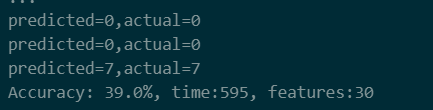
- 